Code by Dr. Martin Ross(1), modified from previous versions written with the assistance of Cindy Liu(2) <br>
ChapGPT (GPT-4) was also used to fix some issues and improve a few things <br>
(1) Associate Professor, Earth and Environmental Sciences <br>
(2) Coop student, Physics & Astronomy <br>
University of Waterloo, Canada

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [2]:
#The default structure is samples (rows) and weight frequencies (cols) from coarse (left) to fine (right)
#The grain size headers are in millimetres
#Rename file and adjust the skiprows and column range as needed

#NOTE:
#In this example, the wt. Freq. of the pan fraction in the input file have been modified to be distributed across the full range of silt and clay in a decreasing fashion
#This can be improved by analyzing the fine fraction with a another method like laser diffractomery

#Load the wt. freq. data as a 2D numpy array
allFreq = np.loadtxt("modified_2021data.txt", skiprows=2, 
                     usecols=np.arange(1,18)).transpose()

#Load the grain size fractions as a 1D numpy array
grainSizesData = np.loadtxt('modified_2021data.txt', skiprows = 1,
                            usecols=np.arange(0, 17), dtype='str')[0]

# Desired number of decimal places for rounding
decimal_places = 4

# grain size labels in mm
grainSizes = []

for i in grainSizesData[:]:
    grainSizes.append(round(float(i), decimal_places))

# sample ID
allLabels = np.loadtxt("modified_2021data.txt", skiprows=2, usecols=0, dtype='str')

In [3]:
print(grainSizes)

[16.0, 8.0, 4.0, 2.0, 1.0, 0.5, 0.25, 0.125, 0.063, 0.0315, 0.0158, 0.0079, 0.0039, 0.002, 0.001, 0.0005, 0.0002]


In [4]:
# function for cumulative curve values
def cumulative(allSamples, start, end):
    
    # inputs: (list of lists, int, int)
    
    sampleCumulative = [[]] * (end-start)
    
    for i in range(start,end):
        sampleCumulative[i-start] = allSamples[:,i]
        sampleCumulative[i-start] = np.cumsum(sampleCumulative[i-start])
        
    return sampleCumulative

# function for cumulative curves
def cumulativeCurve(allSamples, start, end, xSize, ySize):
    
    # inputs: (list of lists, int, int, int, int)
    
    cumulativeVals = cumulative (allSamples, start, end)
    
    for i in range(len(cumulativeVals)):
        if (i % 2) == 0:
            colour = '#465775'
        else:
            colour = '#ef6f6c'
        fig, ax = plt.subplots(1,1, figsize=(xSize, ySize))
        plt.plot(range(len(grainSizes)), cumulativeVals[i], 
                 color=colour, linewidth=2.5, marker='o')
        plt.xticks(np.arange(0,(len(phiVals))), labels=phiVals, fontsize=14)
        plt.ylim((-0.5, 105))
        ax.set_xlabel('phi', fontsize=14)
        ax.set_ylabel('Cumulative wt. Frequency %', fontsize=14)
        ax.tick_params(axis='y', labelsize=14)
        ax.set_title('Cumulative wt. Frequency of Sample '+ str(allLabels[start+i]), 
                     pad=20, fontsize=18)
        plt.show()

In [5]:
def cumulativeCurve2(allSamples, start, end, xSize, ySize):
    
    cumulativeVals = cumulative(allSamples, start, end)
    
    # Define a list of colors and line styles
    colors = ['#A0522D', '#708090', '#2E8B57', '#000000', '#FFA500']
    line_styles = ['-', '--', '-.', ':', (0, (3, 5, 1, 5))]
    markers = ['.', 'o', 'x', '+', '^']
    
    # Create a single figure and axis
    fig, ax = plt.subplots(1, 1, figsize=(xSize, ySize))
    
    for i, (color, style, marker) in enumerate(zip(colors, line_styles, markers)):
        if i >= len(cumulativeVals):
            break  # Exit loop if there are more styles than curves
        
        # Plot the cumulative curve on the same axis with unique style and color
        ax.plot(range(len(grainSizes)), cumulativeVals[i], 
                color=color, linestyle=style, linewidth=2.5, marker=marker, 
                markersize=8,  # Adjust marker size here
                label=f'{allLabels[start+i]}')
    
    plt.xticks(np.arange(0, len(phiVals)), labels=phiVals, fontsize=14)
    plt.ylim((-0.5, 105))
    ax.set_xlabel('phi', fontsize=14)
    ax.set_ylabel('Cumulative wt. Frequency %', fontsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_title('Cumulative wt. Frequency of Selected Samples', 
                 pad=20, fontsize=18)
    ax.legend()  # Show legend with sample labels
    
    plt.show()

# Example usage:
# cumulativeCurve2(allSamples, start=0, end=5, xSize=10, ySize=6)




In [6]:
# calculating phi values
grainSizesFloat = []

for i in grainSizes[:]:
    grainSizesFloat.append(float(i))

phiVals = []

for i in grainSizesFloat:
    phi = -float(round(math.log(i,2)))
    if phi == -0.0:
        phi = 0.0
    phiVals.append(phi)

print(phiVals)

[-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]


In [7]:
# functions for verbal representations of skew and standard deviation
def verbalSkew(skewVal):
    if skewVal > 0.3:
        skewText = "Strongly fine-skewed"
    elif skewVal >= 0.1:
        skewText = "Fine skewed" 
    elif skewVal >= -0.1:
        skewText = "Near symmetrical"
    elif skewVal >=-0.3:
        skewText = "Coarse skewed"
    else:
        skewText = "Strongly coarse skewed"
    return skewText

def verbalStdev(stdev):
    if stdev >4.00:
        stdevText = "Extremely poorly sorted"
    elif stdev >=2.0:
        stdevText = "Very poorly sorted"
    elif stdev >=1.00:
        stdevText = "Poorly sorted"
    elif stdev >=0.71:
        stdevText = "Moderately sorted"
    elif stdev >=0.50:
        stdevText = "Moderately well sorted"
    elif stdev >=0.35:
        stdevText = "Well sorted"
    else:
        stdevText = "Very well sorted"  
    return stdevText

In [8]:
# function for skewness, mean, and stdev
def skewMeanStdev(cumulativeVals):
    
    # inputs: (list)
    
    skews = []
    means = []
    stdevs = []
    
    for i in range(len(cumulativeVals)):
        phi5p = np.interp(5, cumulativeVals[i], phiVals)
        phi16p = np.interp(16, cumulativeVals[i], phiVals)
        phi50p = np.interp(50, cumulativeVals[i], phiVals)
        phi84p = np.interp(84, cumulativeVals[i], phiVals)
        phi95p = np.interp(95, cumulativeVals[i], phiVals)
        
        skew = ((phi84p+phi16p-(2*phi50p))/(2*(phi84p-phi16p))) + ((phi95p+phi5p-(2*phi50p))/(2*(phi95p-phi5p)))
        mean = (phi16p+phi50p+phi84p)/3
        stdev = ((phi84p-phi16p)/4) + ((phi95p-phi5p)/6.6)
        
        skews.append(skew)
        means.append(mean)
        stdevs.append(stdev)
        
    return [skews, means, stdevs]  

In [9]:
# call the cumulative function to get cumulative values
my_cumulative_vals = cumulative(allFreq, 0, 41)

# call the skewMeanStdev function to obtain skewness, mean, and stdev
skewness, mean, stdev = skewMeanStdev(my_cumulative_vals)

# print the outputs
print("Skewness:", skewness)
print("Mean:", mean)
print("Standard Deviation:", stdev)

Skewness: [0.13931141948411366, -0.29190413515234076, -0.1377103913920709, -0.020775702954504167, -0.14903052829193153, -0.25083250560719383, -0.2651470080321675, -0.13049970198604807, -0.227579228237436, -0.4087933584817309, 0.058174810444450734, -0.27420638241047257, -0.28756248967391596, -0.3400264126685347, 0.016085886043828043, -0.03401302503231175, 0.08747719728686569, -0.005899065299713881, -0.189360326058682, -0.13550737208681946, -0.2586295129506658, -0.27313872068808, -0.18833211035014025, -0.3552749415369716, 0.1634568763509518, -0.36580415252767917, -0.47490605666502095, 0.3616385930049414, -0.056918605116826636, -0.2818352292264999, -0.22032903211999677, 0.18646594560503768, -0.11217436731601227, 0.20911838907545055, -0.05586209879605451, -0.2663342666012693, 0.0267583606816289, 0.15759455173510178, 0.005683627805190248, -0.10562742402789742, -0.35046553671971903]
Mean: [4.387289139558732, 3.378442729864504, 2.9452559519042576, 1.6305390707941985, 4.137657919082073, 3.8699

In [10]:
# define the input variables
allSamples = allFreq
start = 0
end = 41

# call the cumulative and skewMeanStdev functions to obtain the outputs
my_cumulative_vals = cumulative(allSamples, start, end)
skewness, mean, stdevs = skewMeanStdev(my_cumulative_vals)


# create a dataframe from the output
df = pd.DataFrame({'Sample ID': allLabels, 'Mean': mean, 'Skewness': skewness, 'Stdev': stdev})

# print the dataframe
print(df)


    Sample ID      Mean  Skewness     Stdev
0   21PXN011B  4.387289  0.139311  1.587357
1   21PXN012B  3.378443 -0.291904  2.669628
2   21PXN013B  2.945256 -0.137710  2.726590
3   21PXN014B  1.630539 -0.020776  3.096551
4   21PXN015B  4.137658 -0.149031  2.094548
5   21PXN016B  3.869929 -0.250833  2.406329
6   21PXN017B  3.903418 -0.265147  2.425267
7   21PXN018B -0.365642 -0.130500  2.084227
8   21PXN019B  4.006585 -0.227579  2.310144
9   21PXN020B  1.163525 -0.408793  1.170579
10  21PXN021B  2.847669  0.058175  2.407751
11  21PXN022B  3.440842 -0.274206  2.657211
12  21PXN023B  3.399393 -0.287562  2.682573
13  21PXN024B  0.105287 -0.340026  2.079868
14  21PXN033B  2.438518  0.016086  2.589639
15  21PXN034B  2.773123 -0.034013  2.577339
16  21PXN035B  2.460716  0.087477  2.356967
17  21PXN036B  2.617946 -0.005899  2.466219
18  21PXN037B  3.152834 -0.189360  2.699256
19  21PXN038B  2.724131 -0.135507  2.850299
20  21PXN039B  2.734450 -0.258630  3.040600
21  21PXN040B  3.219795 -0.27313

In [11]:
def createDataFrame(allSamples, allLabels, start, end):
    cumulativeVals = cumulative(allSamples, start, end)
    statsVals = skewMeanStdev(cumulativeVals)
    skews = statsVals[0]
    means = statsVals[1]
    stdevs = statsVals[2]

    df = pd.DataFrame({'Sample ID': allLabels[start:end], 
                       'Mean': means, 
                       'Skewness': skews, 
                       'Standard Deviation': stdevs})
    
    # add verbal skewness and standard deviation columns
    df['Verbal Skewness'] = df['Skewness'].apply(verbalSkew)
    df['Verbal Stdev'] = df['Standard Deviation'].apply(verbalStdev)
    
    return df

In [12]:
createDataFrame(allFreq,allLabels, 0, 41)

,Sample ID,Mean,Skewness,Standard Deviation,Verbal Skewness,Verbal Stdev
0,21PXN011B,4.387289,0.139311,1.587357,Fine skewed,Poorly sorted
1,21PXN012B,3.378443,-0.291904,2.669628,Coarse skewed,Very poorly sorted
2,21PXN013B,2.945256,-0.137710,2.726590,Coarse skewed,Very poorly sorted
3,21PXN014B,1.630539,-0.020776,3.096551,Near symmetrical,Very poorly sorted
4,21PXN015B,4.137658,-0.149031,2.094548,Coarse skewed,Very poorly sorted
5,21PXN016B,3.869929,-0.250833,2.406329,Coarse skewed,Very poorly sorted
6,21PXN017B,3.903418,-0.265147,2.425267,Coarse skewed,Very poorly sorted
7,21PXN018B,-0.365642,-0.130500,2.084227,Coarse skewed,Very poorly sorted
8,21PXN019B,4.006585,-0.227579,2.310144,Coarse skewed,Very poorly sorted
9,21PXN020B,1.163525,-0.408793,1.170579,Strongly coarse skewed,Poorly sorted


In [13]:
# function to generate weight frequency distribution graphs 
def wtHist(allSamples, start, end, xSize, ySize):
    
    '''
    inputs: (list of lists, int, int, list of 
            lists, int, int)
            
    start>end
    '''
    adjust = start
    if start > 5:
        adjust -= 1
    
    specifiedSamples = [[]] * (end-start)
    for i in range(start,end):
        specifiedSamples[i-start] = allSamples[:,i]
    
    sampleCount = start
    
    for i in specifiedSamples:
        if (sampleCount % 2) == 0:
            colour = '#4464ad'
        else:
            colour = '#a4b0f5'
        fig, ax = plt.subplots(1,1,figsize=(xSize,ySize))
        ax.bar(np.arange(len(i)), i, color=colour, alpha=0.8)
        ax.plot(np.arange(len(i)), i, color='#f58f29', 
                marker='o', linewidth=0)
        plt.xticks(np.arange(0,len(grainSizes))+0.5, labels=grainSizes)
        ax.set_xlabel('Grain Size (mm)', fontsize=14)
        ax.set_ylabel('Frequency (wt. %)', fontsize=14)
        ax.tick_params(axis='y', labelsize=14)
        ax.set_title('Weight Frequency Distribution of Sample '
                     + str(allLabels[sampleCount]), pad=20, fontsize=18)
        plt.show()
        sampleCount+=1

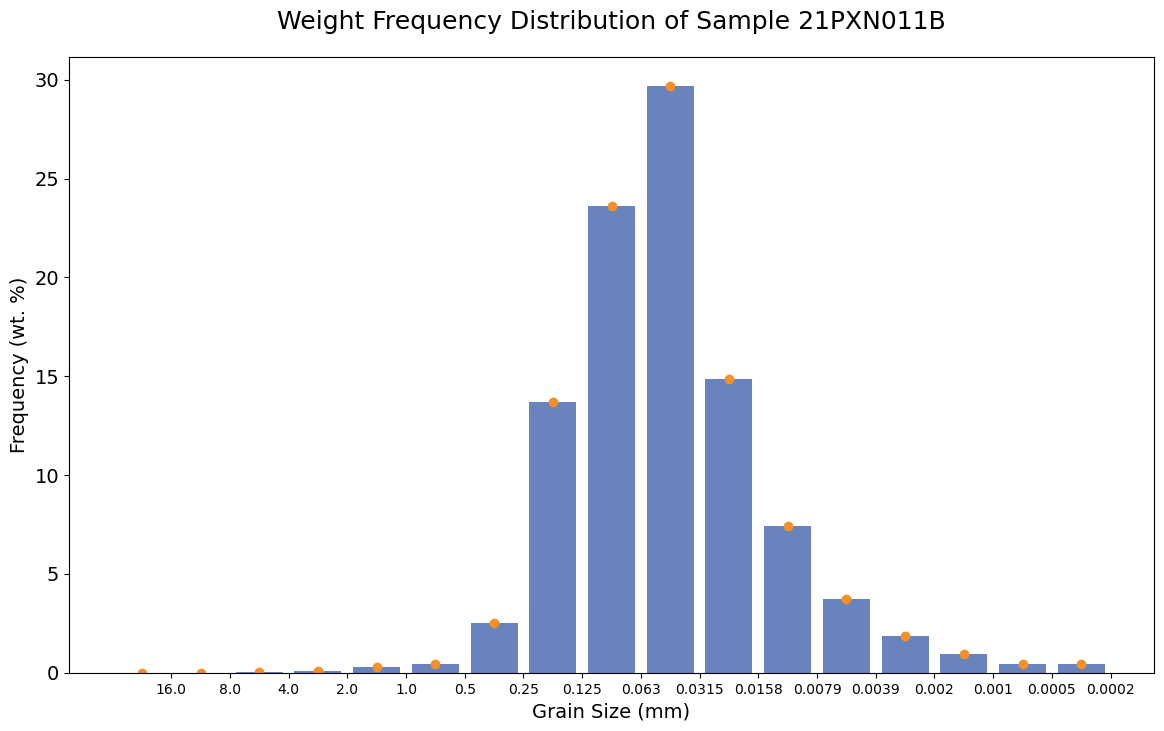

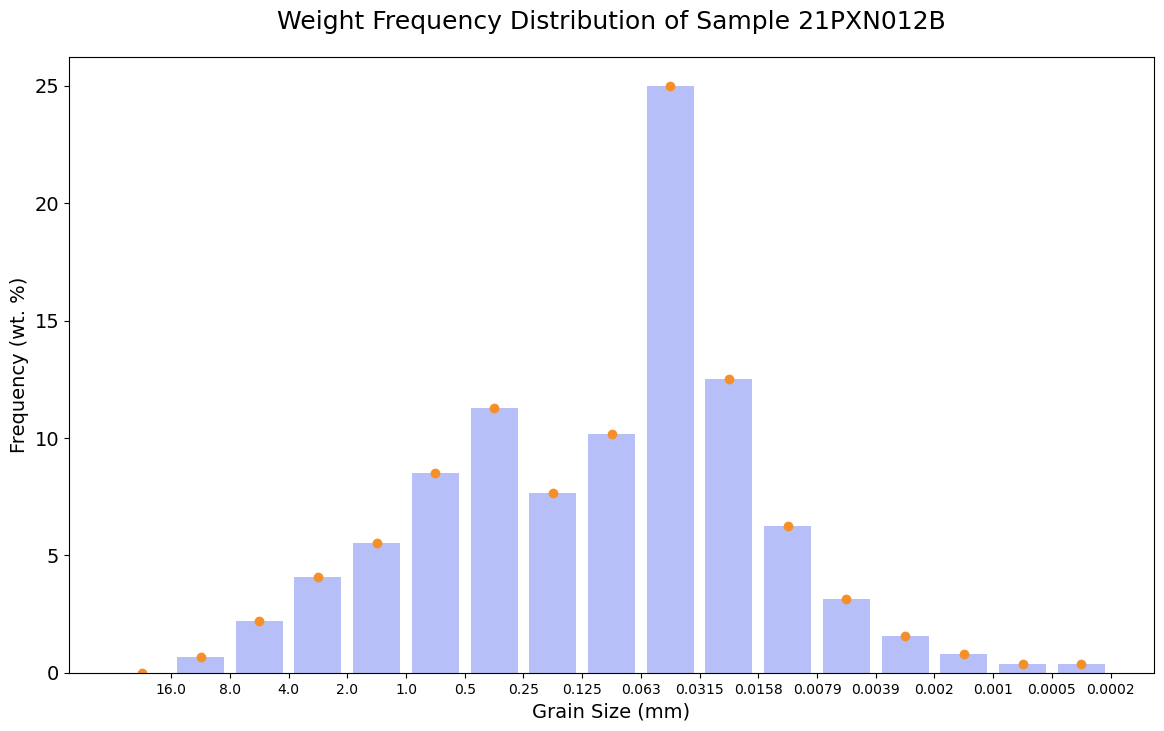

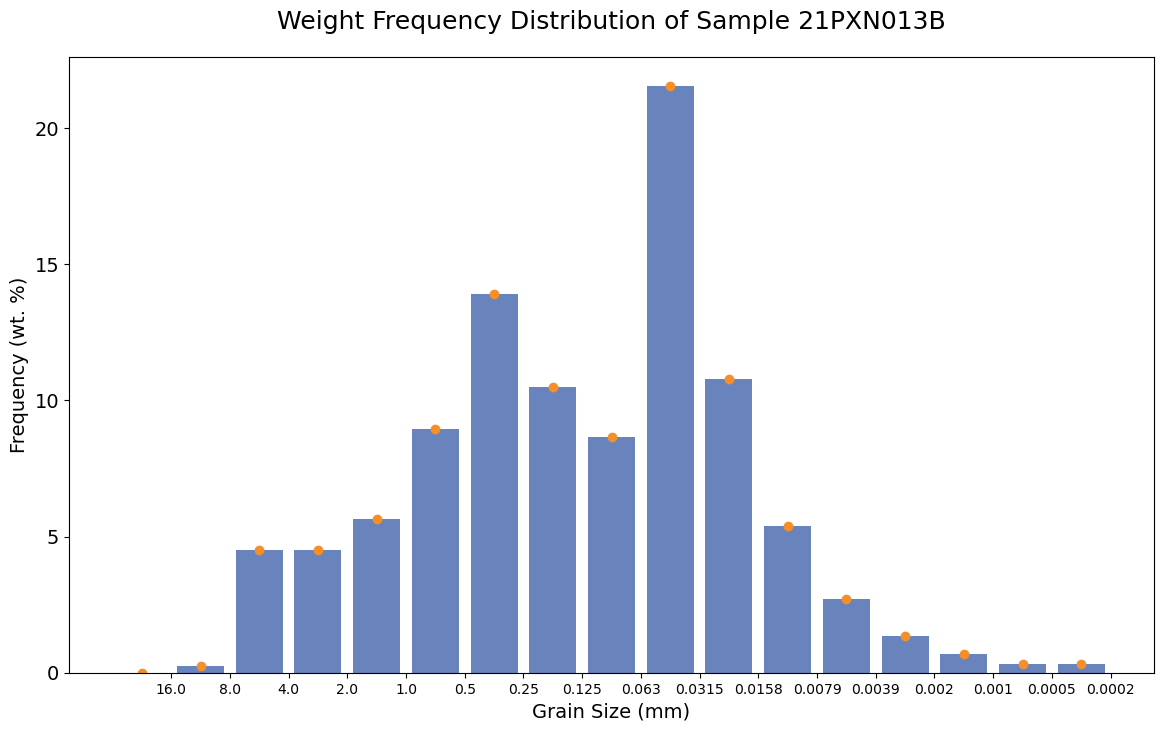

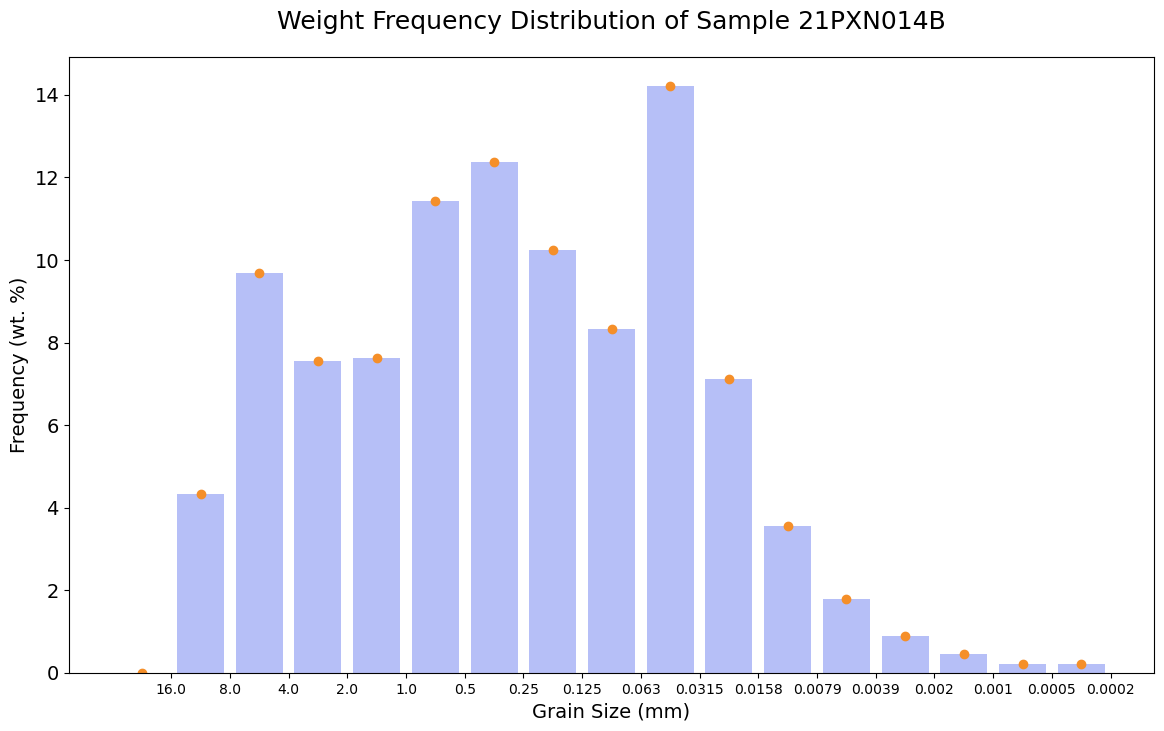

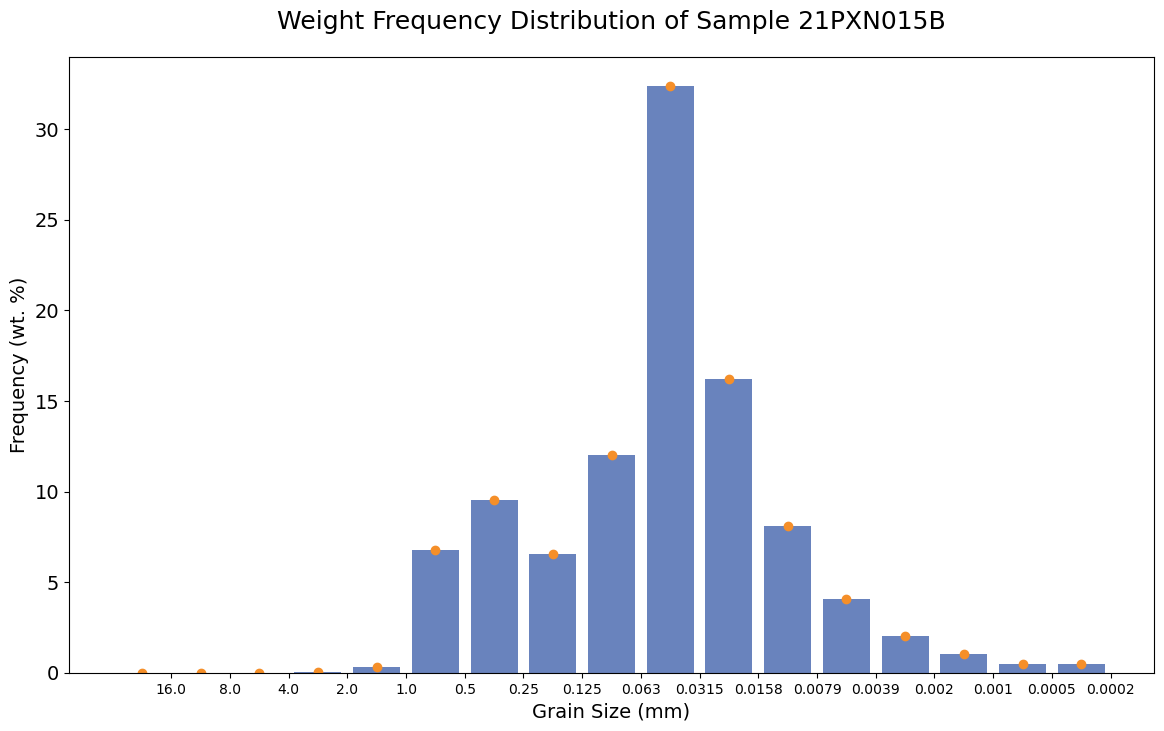

In [14]:
# weight frequency distribution of samples 1-5
wtHist(allFreq,0,5, 14,8)


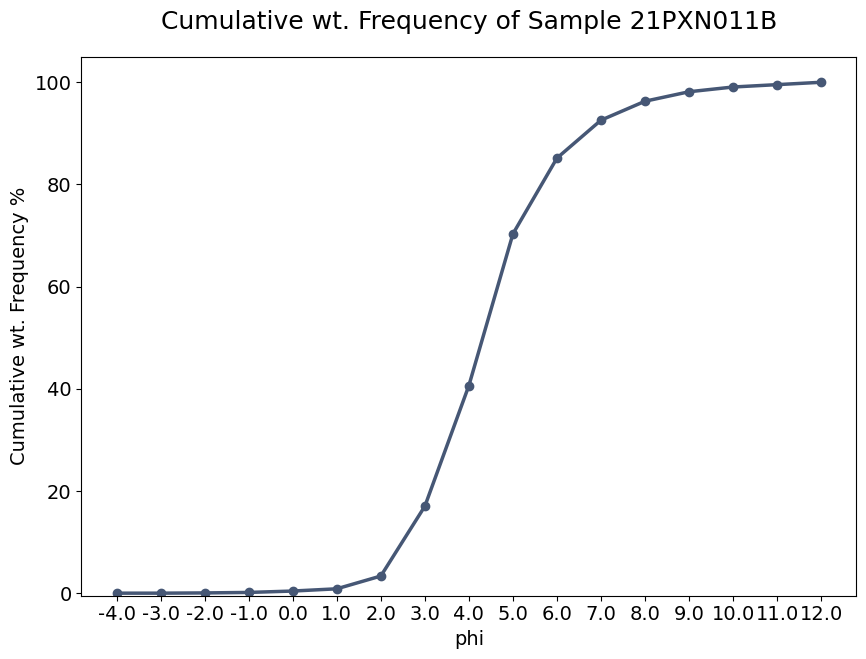

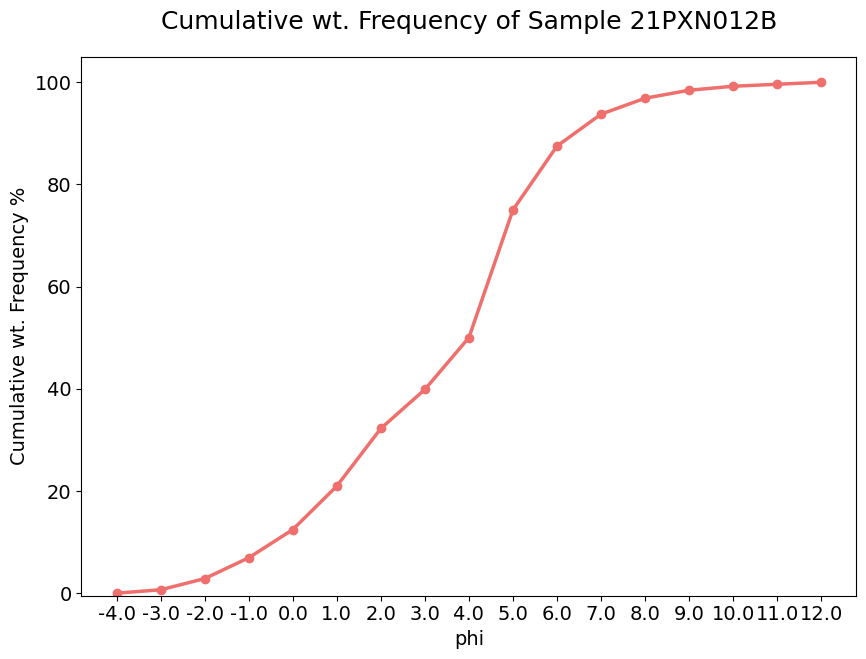

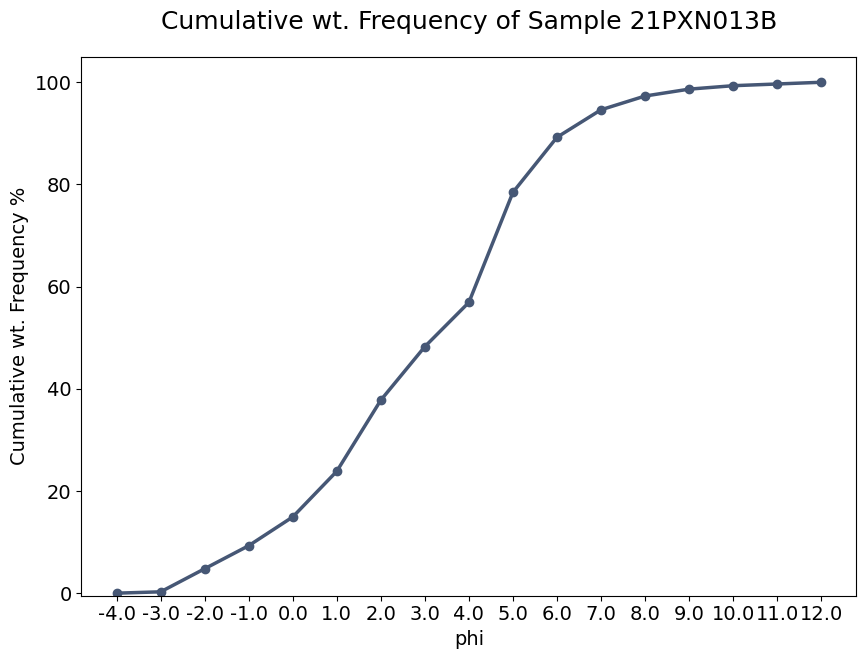

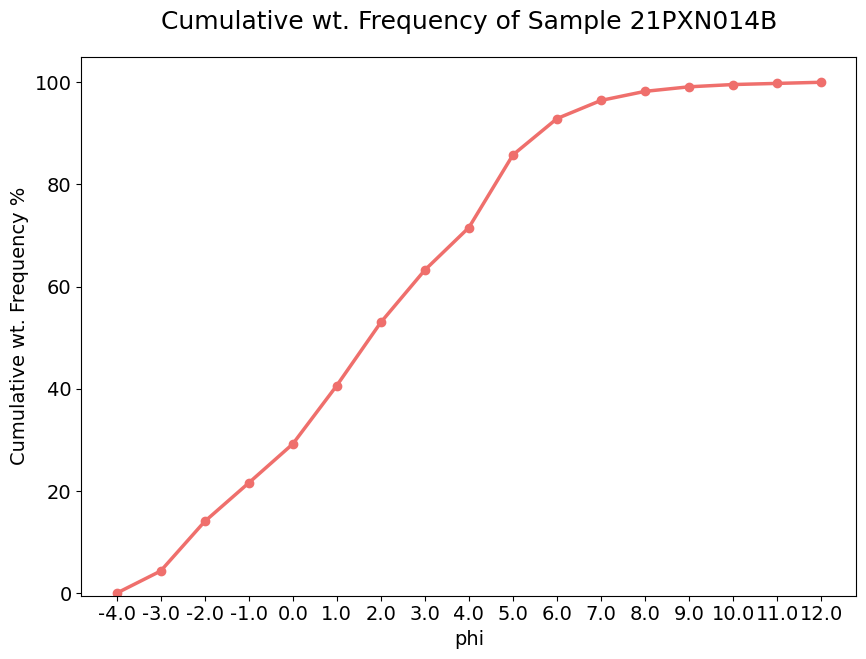

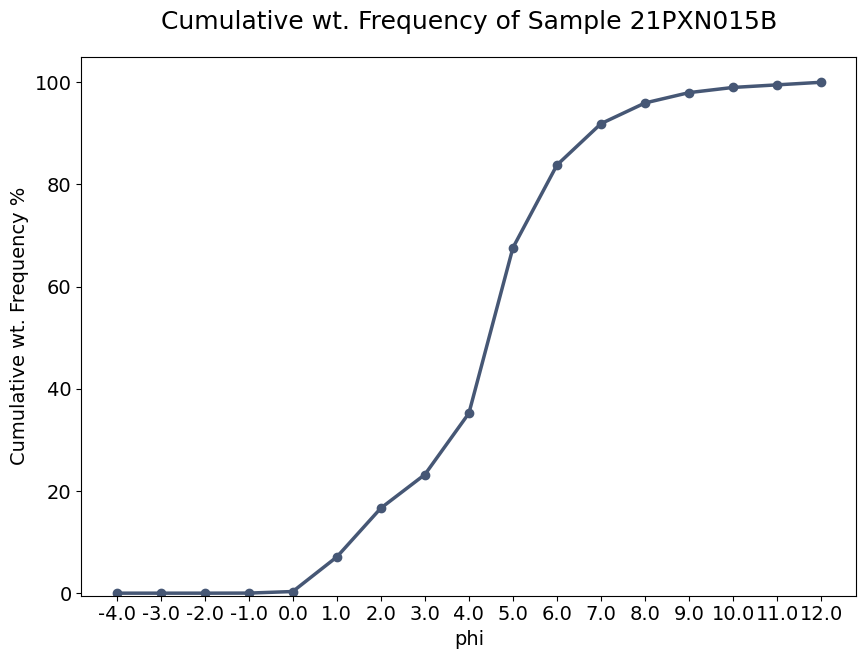

In [15]:
# Call the function to create the figures and save each figure to the PDF file
cumulativeCurve(allFreq, 0, 5, 10, 7) #cumulative curves of grain sizes in samples 1-5

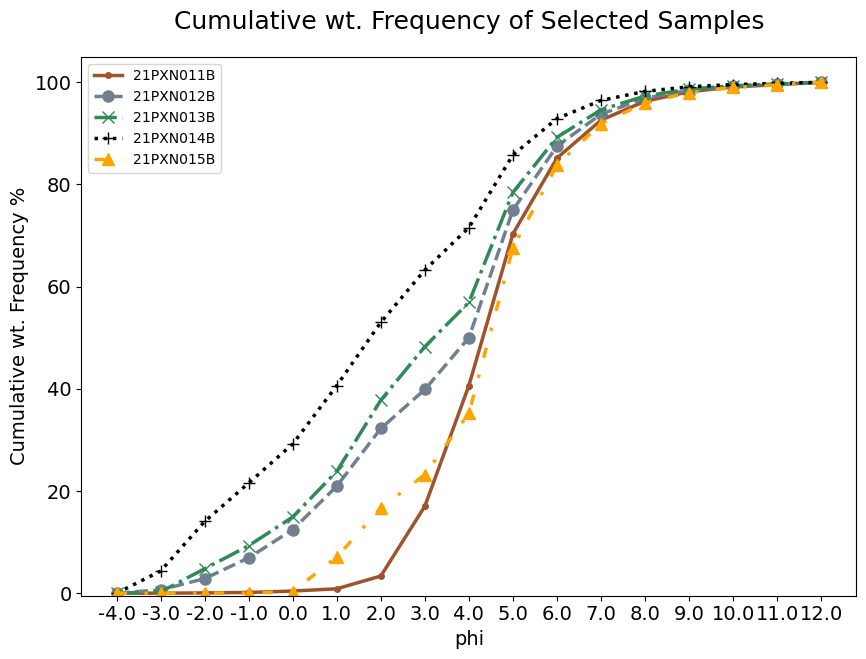

In [16]:
# Call the function to create the figures and save each figure to the PDF file
cumulativeCurve2(allFreq, 0, 5, 10, 7) #cumulative curves of grain sizes in samples 1-5